In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [11]:
import os
import time
import matplotlib.pyplot as pl
import numpy as np
import itertools as it
import healpy as hp
from scipy import ndimage as nd
from scipy import stats
import scipy

from src.core import PowSpecEstimator
import src.this_project as P

In [3]:
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
LMAX = 2*NSIDE

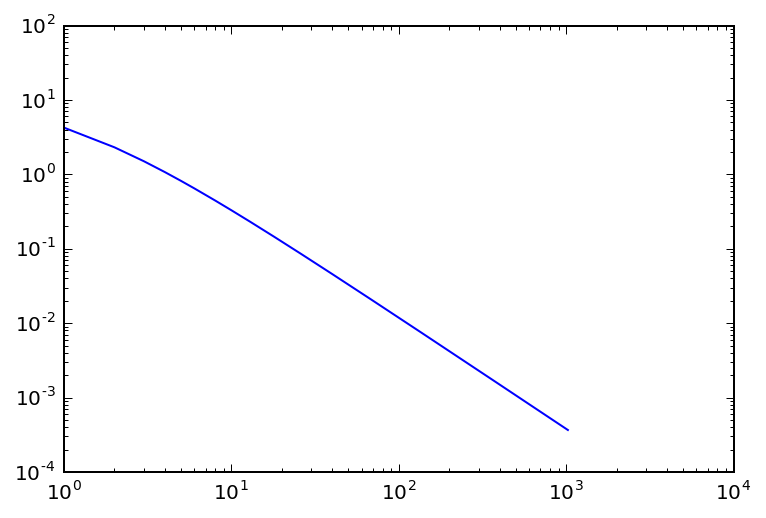

In [4]:
power = (lambda k: 12 / (k + 1) ** 1.5)
cl_in = power(np.arange(LMAX))
ls = np.arange(cl_in.shape[0])
pl.loglog(cl_in)

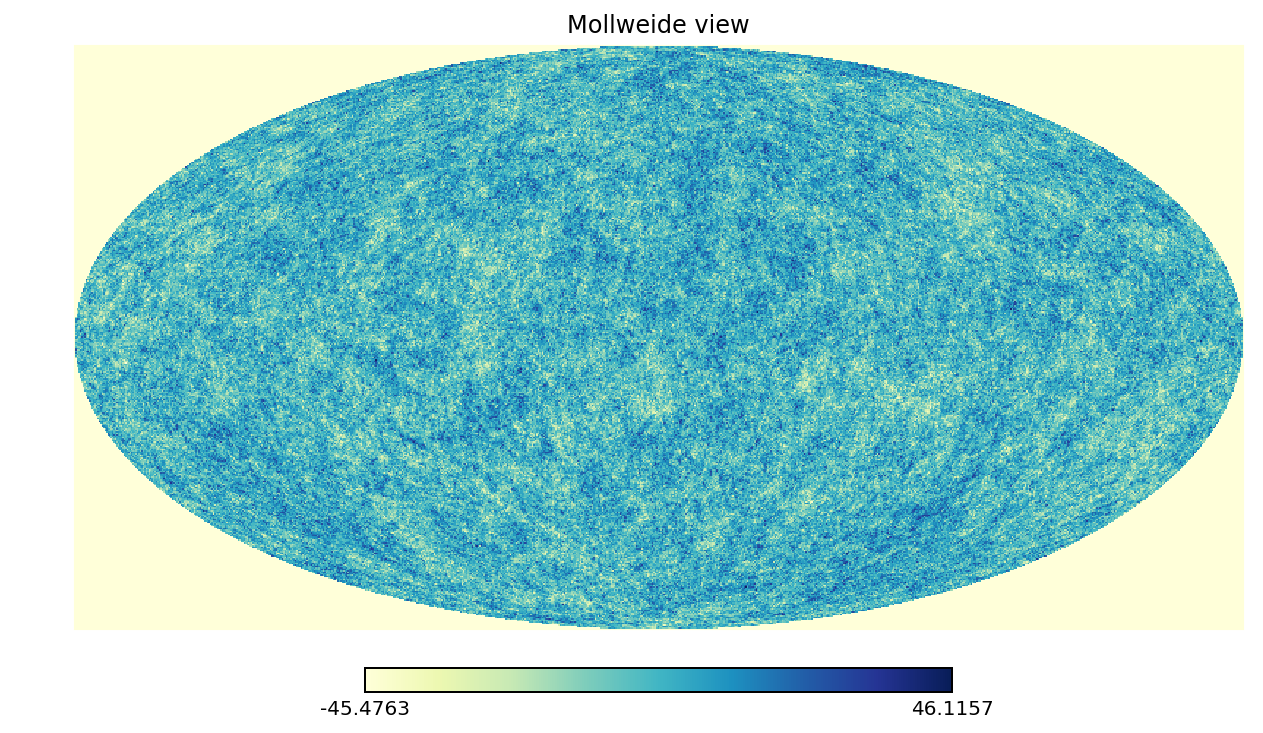

In [13]:
random_field = hp.synfast(cl_in, NSIDE, verbose=False)
hp.mollview(random_field, cmap=P.CMAP)

In [6]:
pse = PowSpecEstimator(random_field, lmax=LMAX)
pse.set_bins(nbins=25)

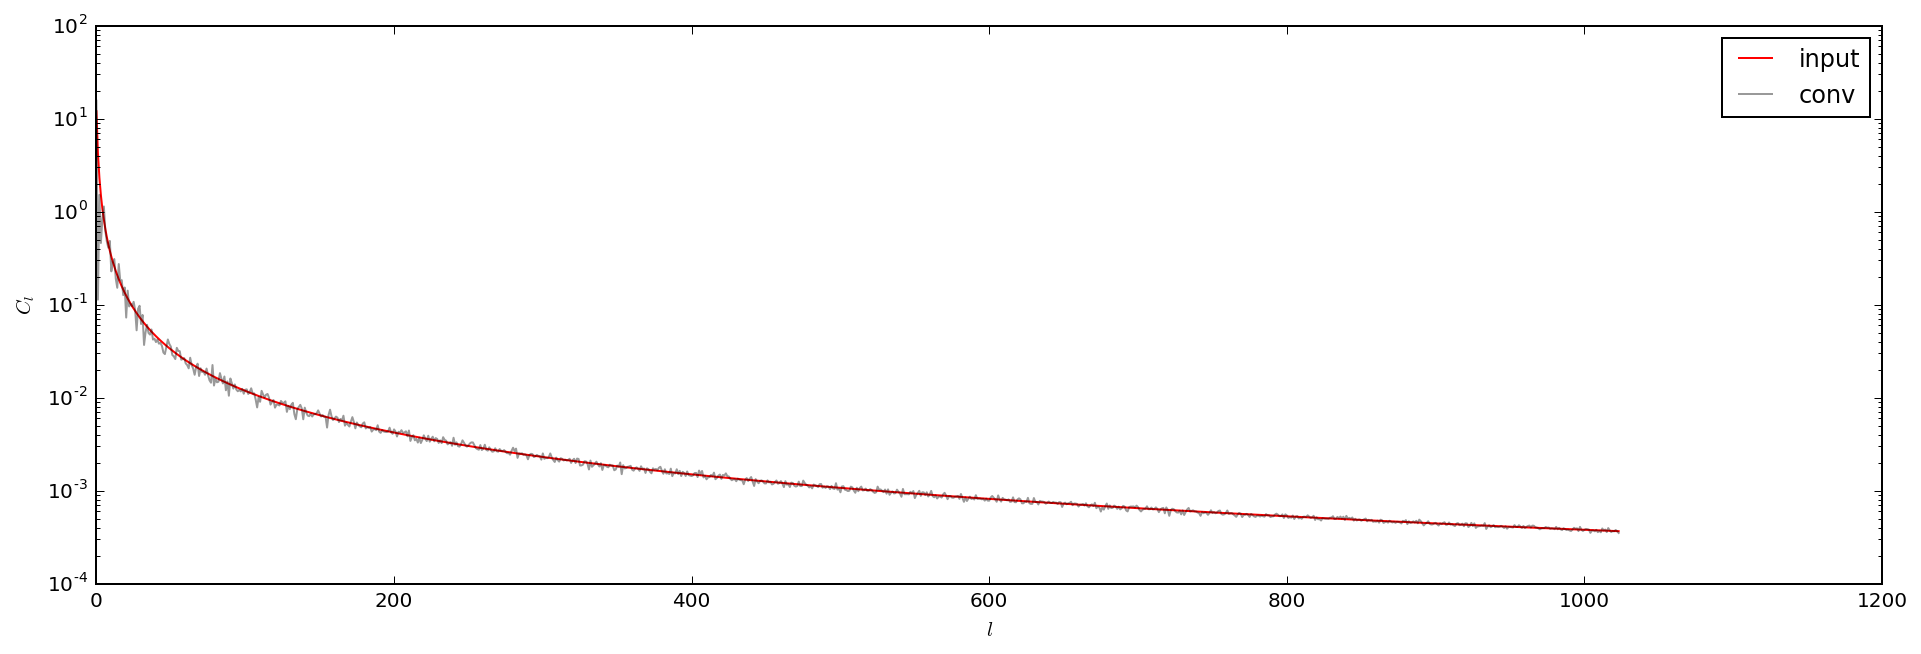

In [7]:
pl.figure(figsize=(16, 5))
pl.plot(pse.ls, cl_in, label='input', c='r')
pl.plot(pse.ls, pse.cl_conv, label='conv', c='k', alpha=0.4)
pl.legend(loc='best')
pl.yscale('log')
pl.xlabel(r'$l$')
pl.ylabel(r'$C_l$')

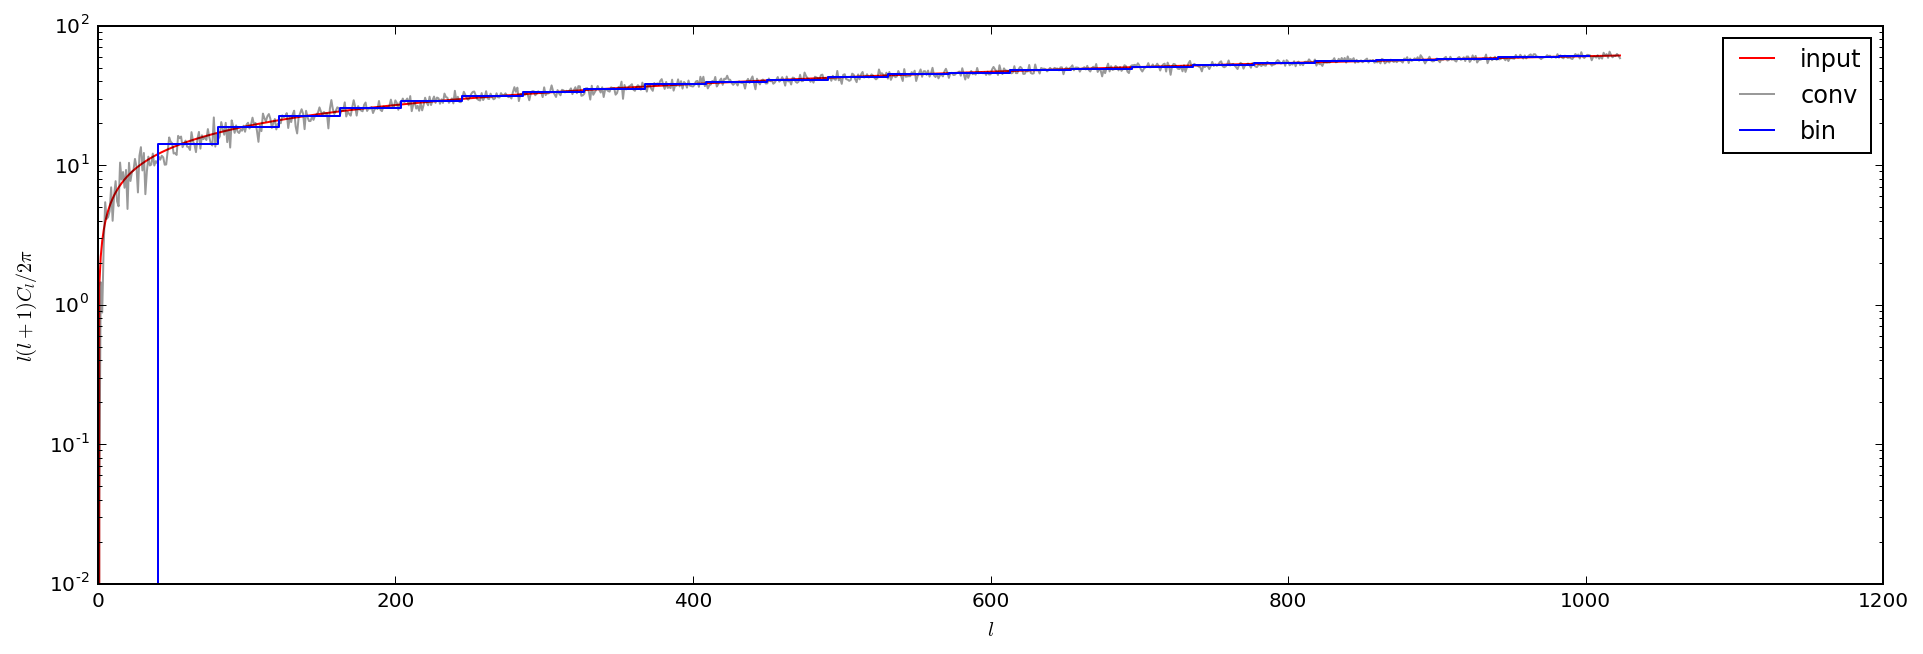

In [9]:
pl.figure(figsize=(16, 5))
pl.plot(pse.ls, pse.norm * cl_in, label='input', c='r')
pl.plot(pse.ls, pse.norm * pse.cl_conv, label='conv', c='k', alpha=0.4)
pl.plot(pse.bin_centres, pse.cl_binned, label='bin', drawstyle='steps-mid', c='b')
pl.legend(loc='best')
pl.yscale('log')
pl.xlabel(r'$l$')
pl.ylabel(r'$l(l+1)C_l/2\pi$')